## 11.4~5 使用skicit-learn中的SVM

In [1]:
import sklearn.datasets as sd
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC,SVC
import numpy as np
import matplotlib.pyplot as plt

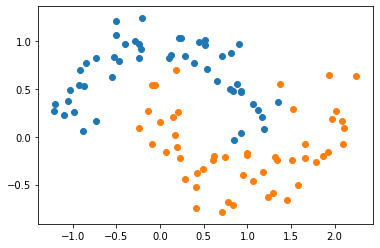

In [7]:
X,y = sd.make_moons(noise=0.16,random_state=666)

plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [12]:
def polynomial_svc(degree,C = 1.0):
    return Pipeline([
        ('ploy',PolynomialFeatures(degree=degree)),
        ('std',StandardScaler()),
        ('svc',LinearSVC(C = C))
    ])

In [11]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [15]:
poly_svc = polynomial_svc(3,0.16)
poly_svc.fit(X,y)

Pipeline(memory=None,
         steps=[('ploy',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 LinearSVC(C=0.16, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


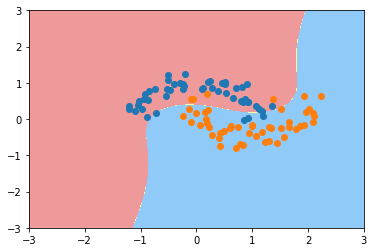

In [16]:
plot_decision_boundary(poly_svc,[-3,3,-3,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [22]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='green')
    plt.plot(plot_x[down_index], down_y[down_index], color='r')

In [20]:
svc = LinearSVC(C = 0.16)
std = StandardScaler()
std.fit(X)
std_X = std.transform(X)
svc.fit(X,y)

LinearSVC(C=0.16, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


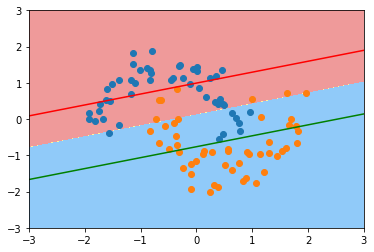

In [27]:
plot_svc_decision_boundary(svc,[-3,3,-3,3])
plt.scatter(std_X[y==0,0],std_X[y==0,1])
plt.scatter(std_X[y==1,0],std_X[y==1,1])
plt.show()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


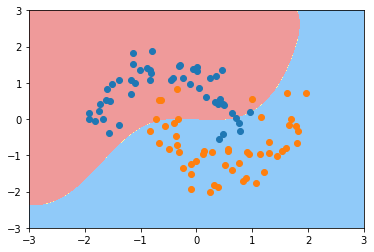

In [28]:
svc2 = SVC(degree=2,C = 0.16)
svc2.fit(std_X,y)
plot_decision_boundary(svc2,[-3,3,-3,3])
plt.scatter(std_X[y==0,0],std_X[y==0,1])
plt.scatter(std_X[y==1,0],std_X[y==1,1])
plt.show()